# Behavioral Cloning Project

The objective with this project is train a convolutional neural network to map raw pixels to steering commands so that it can be used to autonomously drive a car around a simulated track. 

The data that will be used to train the network will be video recordings of a human controlling the car around the track in the simulator. The end objective is to create a CNN that is able to autonomously navigate the track. To get an idea take a look at the image of the simulator below.

![](simulation_image.png)



## Data Exploration

Sample data has been provided by Udacity. This is made up of image files and a corresponding csv file that maps the image file to the corresponding steering label.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [7]:
# path to csv file that maps images to steering angle.
csv_map = 'data/driving_log.csv'

# lets take a look at what the csv file looks like
driving_log = pd.read_csv(csv_map)

# for convenience lets add data to the image paths
base_dir = 'data/'
for i, row in driving_log.iterrows():
    driving_log.set_value(i, 'center', os.path.join(base_dir, row['center'].strip()))
    driving_log.set_value(i, 'left', os.path.join(base_dir, row['left'].strip()))
    driving_log.set_value(i, 'right', os.path.join(base_dir, row['right'].strip()))
        
driving_log[:10]

,center,left,right,steering,throttle,brake,speed
0,data/IMG/center_2016_12_01_13_30_48_287.jpg,data/IMG/left_2016_12_01_13_30_48_287.jpg,data/IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,data/IMG/center_2016_12_01_13_30_48_404.jpg,data/IMG/left_2016_12_01_13_30_48_404.jpg,data/IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,data/IMG/center_2016_12_01_13_31_12_937.jpg,data/IMG/left_2016_12_01_13_31_12_937.jpg,data/IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,data/IMG/center_2016_12_01_13_31_13_037.jpg,data/IMG/left_2016_12_01_13_31_13_037.jpg,data/IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,data/IMG/center_2016_12_01_13_31_13_177.jpg,data/IMG/left_2016_12_01_13_31_13_177.jpg,data/IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,data/IMG/center_2016_12_01_13_31_13_279.jpg,data/IMG/left_2016_12_01_13_31_13_279.jpg,data/IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,data/IMG/center_2016_12_01_13_31_13_381.jpg,data/IMG/left_2016_12_01_13_31_13_381.jpg,data/IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,data/IMG/center_2016_12_01_13_31_13_482.jpg,data/IMG/left_2016_12_01_13_31_13_482.jpg,data/IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,data/IMG/center_2016_12_01_13_31_13_584.jpg,data/IMG/left_2016_12_01_13_31_13_584.jpg,data/IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,data/IMG/center_2016_12_01_13_31_13_686.jpg,data/IMG/left_2016_12_01_13_31_13_686.jpg,data/IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


The csv file is composed of three image entries (right, center, left), steering angle, throttle, brake, and speed. Lets now take a look at a single data point.



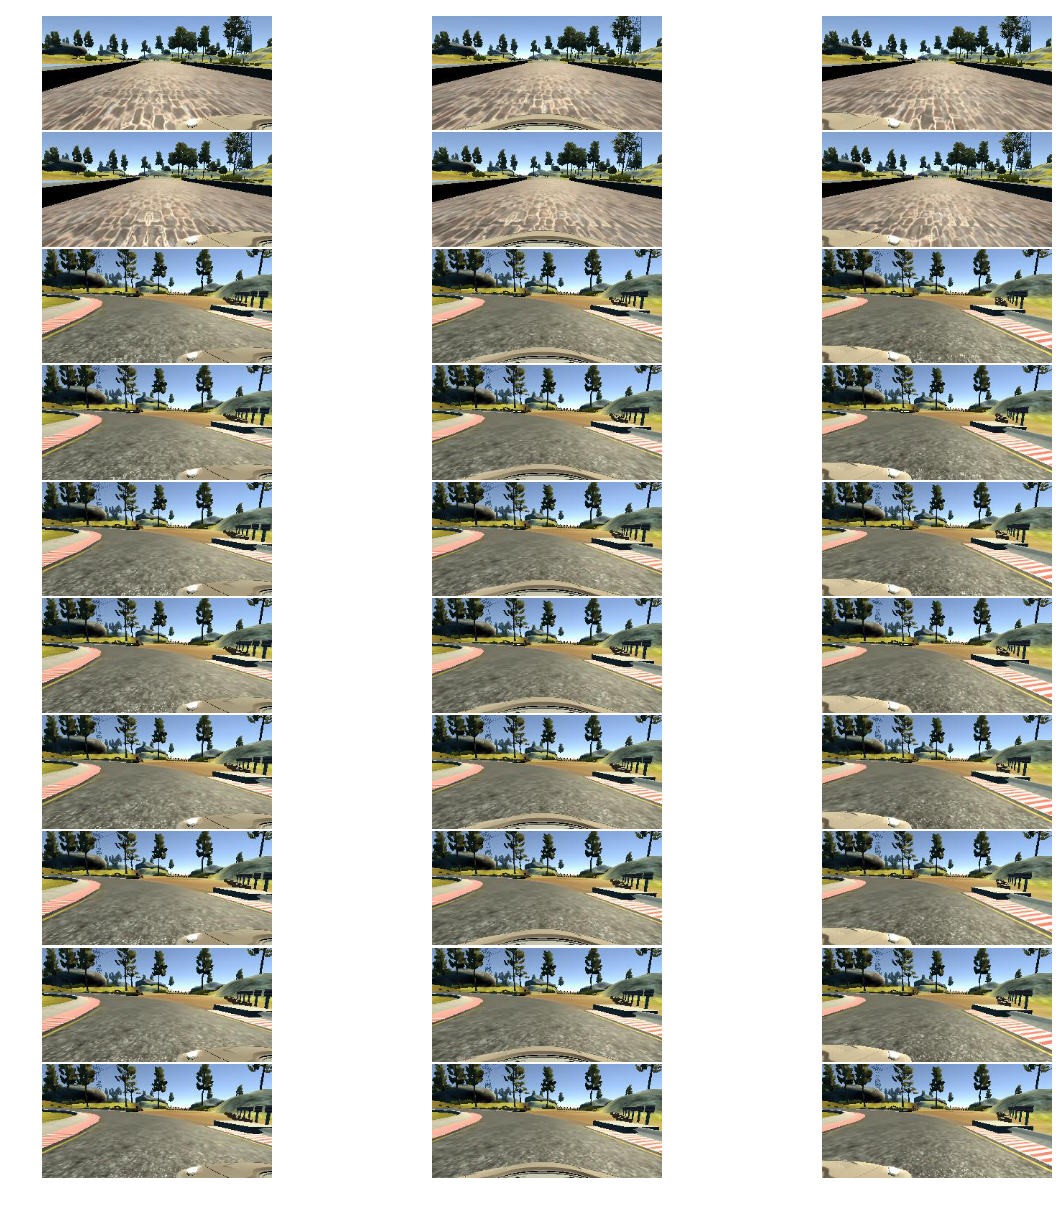

In [35]:
plt.close('all')

n_col = 3
n_row = 10

center_images = [mpimg.imread(img) for img in driving_log['center'][:n_row]]
left_images = [mpimg.imread(img) for img in driving_log['left'][:n_row]]
right_images = [mpimg.imread(img) for img in driving_log['right'][:n_row]]

gs = gridspec.GridSpec(ncols=n_col, nrows=n_row)
gs.update(hspace=0.02, wspace=0.02)
fig = plt.figure(figsize=(15,15))
for row_idx, plot_idx in enumerate(range(0,n_col*n_row,n_col)):
    # left image
    ax1 = plt.subplot(gs[plot_idx])
    ax1.imshow(left_images[row_idx])
    ax1.axis('off')
    # center image
    ax2 = plt.subplot(gs[plot_idx+1])
    ax2.imshow(center_images[row_idx])
    ax2.axis('off')
    # right iamge
    ax3 = plt.subplot(gs[plot_idx+2])
    ax3.imshow(right_images[row_idx])
    ax3.axis('off')

Is the sample data set entirely composed of centerline driving? I am trying to figure out how much variability there is in the data.

Minimum Steering Angle: -0.9426954
Maximum Steering Angle: 1.0


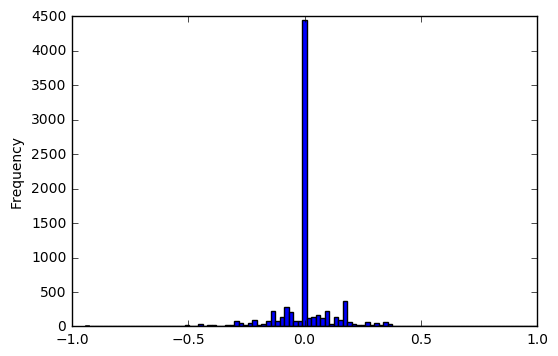

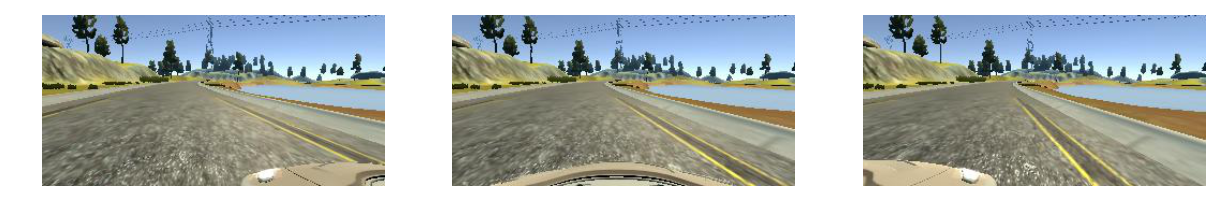

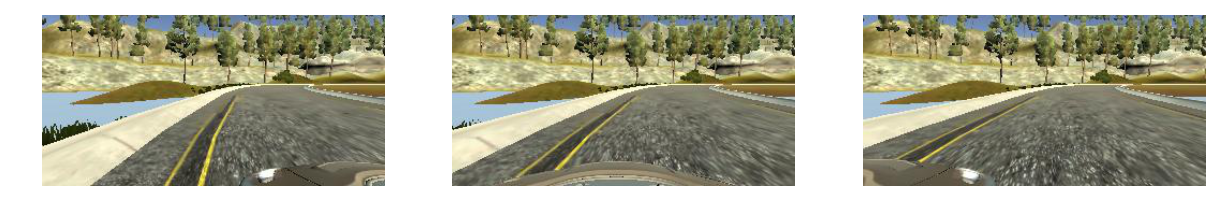

In [52]:
plt.close('all')

driving_log['steering'].plot.hist(bins=100)
min_idx, max_idx = driving_log['steering'].idxmin(), driving_log['steering'].idxmax()
print("Minimum Steering Angle: {}".format(driving_log['steering'][min_idx]))
print("Maximum Steering Angle: {}".format(driving_log['steering'][max_idx]))

# lets look at the images that correspond to those extreme steering angles.
left, center, right = \
    driving_log['left'][min_idx], driving_log['center'][min_idx], driving_log['right'][min_idx]

fig1, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(mpimg.imread(left))
ax1.axis('off')
ax2.imshow(mpimg.imread(center))
ax2.axis('off')
ax3.imshow(mpimg.imread(right))
ax3.axis('off')
fig1.set_figheight(15)
fig1.set_figwidth(15)

left, center, right = \
    driving_log['left'][max_idx], driving_log['center'][max_idx], driving_log['right'][max_idx]

fig2, (ax4, ax5, ax6) = plt.subplots(1,3)
ax4.imshow(mpimg.imread(left))
ax4.axis('off')
ax5.imshow(mpimg.imread(center))
ax5.axis('off')
ax6.imshow(mpimg.imread(right))
ax6.axis('off')
fig2.set_figheight(15)
fig2.set_figwidth(15)

Looking at the histogram it is clear that the majority of the data is center lane driving. There are a couple thousand non-center lane driving examples which is convenient.

**Data Augmentation Ideas**:

- I can apply a horizontal flip and reverse the sign of the steering angles to use a data point in the opposite direction.
- I need to identify the orientation of the left and right cameras with respect to the center camera. This would allow me to transform the image so that it would have the same perspective as the center camera.
- It would be good to augment the brightness of the image.

That is a good start I think.